In [1]:
!pip install google==2.0.2

     |████████████████████████████████| 51kB 2.2MB/s eta 0:00:011
     |████████████████████████████████| 102kB 6.7MB/s ta 0:00:011
  Created wheel for google: filename=google-2.0.2-py2.py3-none-any.whl size=45464 sha256=3b6733dd3469ba656531521364c750e7e8d6848e7e3cce71e2177dffaf8ebb10
  Stored in directory: /root/.cache/pip/wheels/ac/25/a4/837e13b998311f9824965755f86ecf69ef9ee1a7db10834cfc
Successfully built google
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install google-colab==1.0.0 

     |████████████████████████████████| 81kB 1.1MB/s eta 0:00:011
     |████████████████████████████████| 71kB 969kB/s eta 0:00:011
     |████████████████████████████████| 112kB 747kB/s eta 0:00:01
     |████████████████████████████████| 768kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 8.0MB 824kB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 929kB/s eta 0:00:01
     |████████████████████████████████| 61kB 1.0MB/s eta 0:00:011
     |████████████████████████████████| 491kB 977kB/s eta 0:00:01
     |████████████████████████████████| 245kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 122kB 1.2MB/s eta 0:00:01
  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102290 sha256=2d604266796d68fe6cac0d884ba38e2c32e9850dc31b7a23226247c258238e76
  Stored in directory: /root/.cache/pip/wheels/38/0d/59/701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-no

In [5]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#download the dataset for the dog-breed identification challenge https://www.kaggle.com/c/dog-breed-identification
!kaggle competitions download -c dog-breed-identification

#unzip the downloaded files
from zipfile import ZipFile
zip_files = ["labels.csv.zip", "test.zip" ,"train.zip"]
for files in zip_files:
    with ZipFile(files, "r") as zips:
        zips.extractall()
print("All Files Extracted")

/usr/local/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


KeyboardInterrupt: 

In [4]:
!pip install tensorflow==2.0.0 

  Using cached https://files.pythonhosted.org/packages/7b/cb/786dc53d93494784935a62947643b48250b84a882474e714f9af5e1a1928/google_auth-1.7.1-py2.py3-none-any.whl
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from zipfile import ZipFile
zip_files = ["test.zip" ,"train.zip"]
for files in zip_files:
    with ZipFile(files, "r") as zips:
        zips.extractall()
print("All Files Extracted")

All Files Extracted


In [6]:
#import the neccesary packages
import pandas as pd
import numpy as np

#constants
num_classes = 70 # the number of breeds we want to classify
seed = 42 # makes the random numbers in numpy predictable
im_size = 299 # This size of the images
batch_size = 32

#Read the csv into a dataframe, group the breeds and 
df = pd.read_csv('labels.csv')
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)
df = df[df['breed'].isin(selected_breed_list)]
df['filename'] = df.apply(lambda x: ('train/' + x['id'] + '.jpg'), axis=1)


breeds = pd.Series(df['breed'])
print("total number of breeds to classify",len(breeds.unique()))

df.head()

total number of breeds to classify 70


,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier,train/002211c81b498ef88e1b40b9abf84e1d.jpg
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier,train/00290d3e1fdd27226ba27a8ce248ce85.jpg
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,train/003df8b8a8b05244b1d920bb6cf451f9.jpg


In [8]:
!pip install Pillow
!pip install Keras==2.3.1

     |████████████████████████████████| 2.1MB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from keras.preprocessing import image
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    path =  train_or_test + "/" + img_id + ".jpg"
    img = image.load_img(path, target_size=size)
    return image.img_to_array(img)

Using TensorFlow backend.


## <u>Label Encoding</u>
### The Breeds Of the Dogs Comes as the String or Names. So In Order to Feed the Labels into the Neural Network, We are Converting the Breed names into Numeric Characters

In [10]:
from sklearn.preprocessing import LabelEncoder
#Declaring the Instance
label_enc = LabelEncoder()
np.random.seed(seed=seed)
rnd = np.random.random(len(df))
#This returns an Array of Boolean
train_idx = rnd < 0.9
valid_idx = rnd >= 0.9

#Here We are Encoding and Spliting the Data into Testing and Training Set.
y_train = label_enc.fit_transform(df["breed"].values)
ytr = y_train[train_idx]
yv = y_train[valid_idx]

In [43]:
#import sys
#from PIL import Image
#sys.modules['Image'] = Image 

In [11]:
from tqdm import tqdm
#Importing the Pretrained Neural Network(For Transfer Learning)
from keras.applications import xception

#Creating Placeholder for Image Array(Training and Validation Images With 3 Colour Channels i.e Depth)
x_train = np.zeros((train_idx.sum(), im_size, im_size, 3), dtype='float32')
x_valid = np.zeros((valid_idx.sum(), im_size, im_size, 3), dtype='float32')
train_i = 0
valid_i = 0
for i, img_id in tqdm(enumerate(df['id'])):
    #Reading the Image using Pre-Processing Function Created Before
    img = read_img(img_id, 'train', (im_size, im_size))
    #Here We are Normalizing the Image. It Takes the Numpy Array of Image and Converts into the Format that 
    #Xception Neural Network Reocgs i.e. Value Between [-1,1]
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    #Block Execuites If Array Contains True(Bool)
    if train_idx[i]:
        x_train[train_i] = x
        train_i += 1
        #Adding It To the Training Set
    elif valid_idx[i]:
        x_valid[valid_i] = x
        valid_i += 1
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

6532it [00:26, 243.11it/s]

Train Images shape: (5890, 299, 299, 3) size: 1,579,715,670


## Image Augmentation(Real Time)
### This Technique Will Increase Image Size, Involving Creating a New Image By Transformation(Rotation, Scaling, Noise). This Helps in Effective Training Of the Neural Network(CNN)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

#Declaring the Class For Image Augmentation Process(Options are Parameters)
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#Generating the Image From Fectures Declared
train_generator = train_datagen.flow(x_train, 
                                     ytr, 
                                     batch_size=batch_size)


valid_datagen = ImageDataGenerator()

valid_generator = valid_datagen.flow(x_valid, 
                                     yv, 
                                     batch_size=batch_size)


## Transfer Learning And Model Declaration
### We Are Using <u>Xception</u> Pre-Trained Model For Our Task

In [13]:
#Declaring the Neural Network model
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input

# create the base pre-trained model
#We are Not Including the Weights of Last Layer(Modifying)
base_model = xception.Xception(weights='imagenet', include_top=False)
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional Xception layers
for layer in base_model.layers:
    layer.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer and set it to the number of breeds we want to classifiy, 
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

83689472/83683744 [==============================] - 1s 0us/step


In [14]:
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 10
learning_rate = 0.001

# checkpoints
early_stopping = EarlyStopping(monitor='val_acc', patience=5)
STAMP = "{}_dog_breed_model".format(datetime.date.today().strftime("%Y-%m-%d"))

#Saving Our Trained Model
bst_model_path = "{}.h5".format(STAMP)
model_checkpoint = ModelCheckpoint(bst_model_path,
                                   save_best_only=True,
                                   save_weights_only=False,
                                  verbose=1)



# compile the model (should be done *after* setting layers to non-trainable)
optimizer = RMSprop(lr=learning_rate, rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

hist = model.fit_generator(train_generator,
                           steps_per_epoch=train_idx.sum() // batch_size,
                           epochs=epochs, callbacks=[early_stopping, model_checkpoint],
                           validation_data=valid_generator,
                           validation_steps=valid_idx.sum() // batch_size)

# serialize weights to HDF5
model.save(bst_model_path)
print("Saved model to disk")

Epoch 1/10
184/184 [==============================] - 1029s 6s/step - loss: 1.2353 - accuracy: 0.6927 - val_loss: 0.0950 - val_accuracy: 0.9312

Epoch 00001: val_loss improved from inf to 0.09504, saving model to 2019-11-25_dog_breed_model.h5


/usr/local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
184/184 [==============================] - 1021s 6s/step - loss: 0.8369 - accuracy: 0.7820 - val_loss: 0.4156 - val_accuracy: 0.9262

Epoch 00002: val_loss did not improve from 0.09504
Epoch 3/10
184/184 [==============================] - 1018s 6s/step - loss: 0.8123 - accuracy: 0.7917 - val_loss: 0.2006 - val_accuracy: 0.9246

Epoch 00003: val_loss did not improve from 0.09504
Epoch 4/10
184/184 [==============================] - 1019s 6s/step - loss: 0.7776 - accuracy: 0.8088 - val_loss: 0.1102 - val_accuracy: 0.9475

Epoch 00004: val_loss did not improve from 0.09504
Epoch 5/10
184/184 [==============================] - 1021s 6s/step - loss: 0.7407 - accuracy: 0.8102 - val_loss: 0.2133 - val_accuracy: 0.9311

Epoch 00005: val_loss did not improve from 0.09504
Epoch 6/10
184/184 [==============================] - 1018s 6s/step - loss: 0.7282 - accuracy: 0.8202 - val_loss: 0.2281 - val_accuracy: 0.9377

Epoch 00006: val_loss did not improve from 0.09504
Epoch 7/10
184/184 [

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


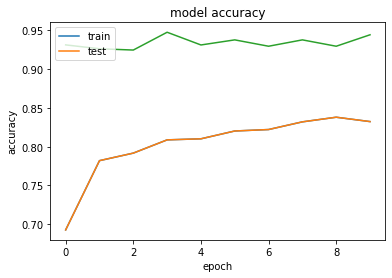

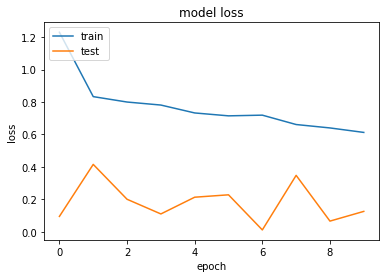

In [17]:
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


#This Function is For Pre-Processing the Image For Feeding into Neural Network
def predict_from_image(img_path):

    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    pred = model.predict(img_tensor)
    sorted_breeds_list = sorted(selected_breed_list)
    predicted_class = sorted_breeds_list[np.argmax(pred)]
    
    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return predicted_class, max(pred)

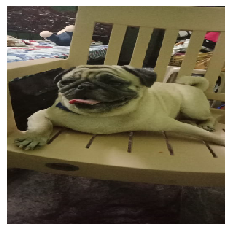

pug
5.3189523896435276e-08


In [19]:
#Getting Image From URL
#!wget http://www.dogbreedslist.info/uploads/allimg/dog-pictures/Scottish-Deerhound-2.jpg

#Testing This With My Own Pug Dog Image Taken In Phone
img_path = 'puggy.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

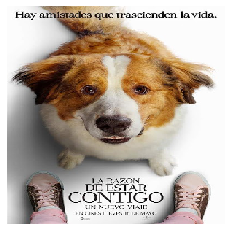

saint_bernard
1.6080701925602625e-06


In [20]:
img_path = 'perro.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

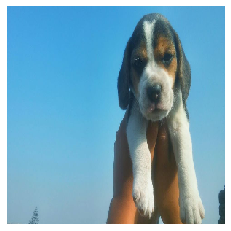

beagle
4.935675406159135e-07


In [22]:
img_path = 'vanessa.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

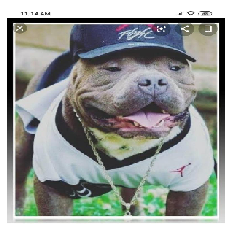

pug
0.0017408144194632769


In [23]:
img_path = 'chiki.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

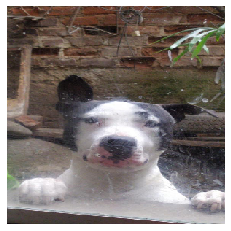

boston_bull
6.487876817118376e-05


In [24]:
img_path = 'ringo.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

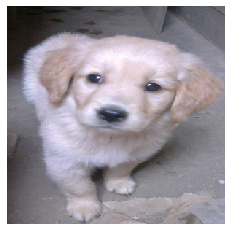

labrador_retriever
4.149571032030508e-05


In [25]:
img_path = 'kira.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

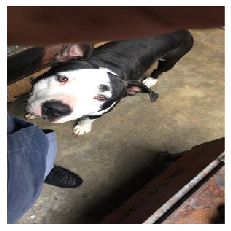

greater_swiss_mountain_dog
0.002318867016583681


In [26]:
img_path = 'ringo2.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

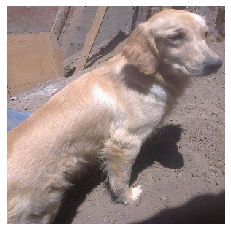

saluki
4.3548992834985256e-05


In [27]:
img_path = 'kira2.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

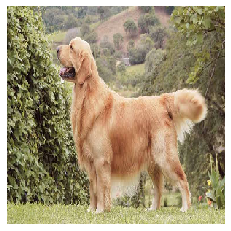

labrador_retriever
2.5576840926078148e-05


In [28]:
img_path = 'golden.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

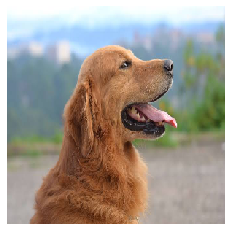

labrador_retriever
0.00030205282382667065


In [29]:
img_path = 'golden2.jpeg'    # dog
classes, prob = predict_from_image(img_path)
print(f"{classes}\n{prob[selected_breed_list.index(classes)]}")

## Server


In [3]:
from keras.models import load_model
model = load_model('2019-04-12_dog_breed_model.h5')
# predict_from_image("https://scontent.xx.fbcdn.net/v/t1.0-0/p480x480/46450986_347833089130675_1126767133754130432_n.jpg?_nc_cat=111&_nc_ht=scontent.xx&oh=9a149438b2243510e3b8d16921e575bc&oe=5C6FA5C1")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
# import urllib.request 

# urllib.request.urlretrieve("https://scontent.xx.fbcdn.net/v/t1.0-0/p480x480/46450986_347833089130675_1126767133754130432_n.jpg?_nc_cat=111&_nc_ht=scontent.xx&oh=9a149438b2243510e3b8d16921e575bc&oe=5C6FA5C1", "image.jpg")
# predict_from_image("image.jpg")
import requests
f = open('00000001.jpg','wb')
f.write(requests.get('URL').content)
f.close()

In [6]:
selected_breed_list = ['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound',
 'lakeland_terrier',
 'saluki',
 'papillon',
 'whippet',
 'siberian_husky',
 'norwegian_elkhound',
 'pug',
 'chow',
 'italian_greyhound',
 'pembroke',
 'ibizan_hound',
 'border_terrier',
 'newfoundland',
 'lhasa',
 'silky_terrier',
 'bedlington_terrier',
 'dandie_dinmont',
 'irish_setter',
 'sealyham_terrier',
 'rhodesian_ridgeback',
 'old_english_sheepdog',
 'collie',
 'boston_bull',
 'english_foxhound',
 'bouvier_des_flandres',
 'african_hunting_dog',
 'schipperke',
 'kelpie',
 'weimaraner',
 'bloodhound',
 'bluetick',
 'saint_bernard',
 'labrador_retriever',
 'chesapeake_bay_retriever',
 'norfolk_terrier',
 'english_setter',
 'wire-haired_fox_terrier',
 'kerry_blue_terrier',
 'scotch_terrier',
 'yorkshire_terrier',
 'groenendael',
 'greater_swiss_mountain_dog',
 'irish_terrier',
 'basset',
 'keeshond',
 'west_highland_white_terrier',
 'gordon_setter',
 'malamute',
 'affenpinscher',
 'toy_poodle']